In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aero-engine-defect-new/Aero-engine_defect-detect_new/labels/val.cache
/kaggle/input/aero-engine-defect-new/Aero-engine_defect-detect_new/labels/train.cache
/kaggle/input/aero-engine-defect-new/Aero-engine_defect-detect_new/labels/train.cache.npy
/kaggle/input/aero-engine-defect-new/Aero-engine_defect-detect_new/labels/val/3.txt
/kaggle/input/aero-engine-defect-new/Aero-engine_defect-detect_new/labels/val/14_1.txt
/kaggle/input/aero-engine-defect-new/Aero-engine_defect-detect_new/labels/val/10.txt
/kaggle/input/aero-engine-defect-new/Aero-engine_defect-detect_new/labels/val/12_1.txt
/kaggle/input/aero-engine-defect-new/Aero-engine_defect-detect_new/labels/val/19.txt
/kaggle/input/aero-engine-defect-new/Aero-engine_defect-detect_new/labels/val/5.txt
/kaggle/input/aero-engine-defect-new/Aero-engine_defect-detect_new/labels/val/15_3.txt
/kaggle/input/aero-engine-defect-new/Aero-engine_defect-detect_new/labels/val/7_1.txt
/kaggle/input/aero-engine-defect-new/Aero-engine_defect

In [2]:
import os
import glob
import matplotlib.pyplot as plt
import tensorflow as tf

2024-03-27 16:32:49.862237: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-27 16:32:49.862446: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-27 16:32:50.034842: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
data_loc = "/kaggle/input/aero-engine-defect-new/Aero-engine_defect-detect_new/"
images_data = os.path.join(data_loc, "images")
labels_data = os.path.join(data_loc, "labels")
train_images =  os.path.join(images_data, "train")
val_images = os.path.join(images_data, "val")
train_labels = os.path.join(labels_data, "train")
val_labels = os.path.join(labels_data, "val")

In [4]:
train_img_filenames = os.listdir(train_images)
train_img_filenames.sort()
train_labl_filenames = os.listdir(train_labels)
train_labl_filenames.sort()

In [5]:
print(f"Total number of Training Images : {len(train_img_filenames)}")
print(f"Total number of Training Labels : {len(train_labl_filenames)}")

# print(f"Total number of Training Images : {len(train_img_filenames)}")
# print(f"Total number of Training Labels : {len(train_labl_filenames)}")

Total number of Training Images : 257
Total number of Training Labels : 242


In [6]:
valid_img_filenames = []
valid_lbl_filenames = []
for i in train_img_filenames:
    name_img, _ = os.path.splitext(i)
    if f"{name_img}.txt" in train_labl_filenames:
        valid_img_filenames.append(train_images+"/"+name_img+".jpg")
        valid_lbl_filenames.append(train_labels+"/"+name_img+".txt")

print(f"Total number of Training Data : {len(valid_img_filenames)}")
print(f"Total number of Training Data : {len(valid_lbl_filenames)}")

Total number of Training Data : 239
Total number of Training Data : 239


In [7]:
print(f"{train_images}")
print(f"{train_labels}")

/kaggle/input/aero-engine-defect-new/Aero-engine_defect-detect_new/images/train
/kaggle/input/aero-engine-defect-new/Aero-engine_defect-detect_new/labels/train


In [8]:
def read_images(image_name,label):
    image = tf.io.read_file(image_name)
    image = tf.image.decode_image(image, channels=3)
    return image, label


In [9]:
for lbl_filename in valid_lbl_filenames:
    print(lbl_filename)
    df = pd.read_csv(lbl_filename, sep="\t")
    print(df.columns.values)
    break

/kaggle/input/aero-engine-defect-new/Aero-engine_defect-detect_new/labels/train/1.txt
['0 0.544118 0.458802 0.500613 0.682074']


In [10]:
img, lbl = read_images("/kaggle/input/aero-engine-defect-new/Aero-engine_defect-detect_new/images/train/1.jpg", df.columns.values)
# df.columns.values

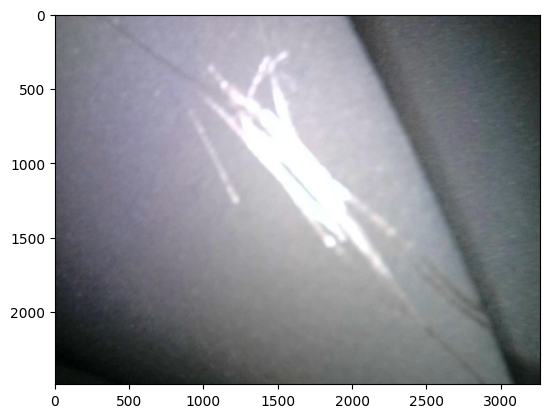

In [11]:
plt.imshow(img.numpy())